In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
train = pd.read_csv("Train_data.csv")
test = pd.read_csv("Test_data.csv")

In [3]:
# checking the dimensions of the datasets

print(f"Training :: {train.shape}")
print(f"Testing :: {test.shape}")

Training :: (25192, 42)
Testing :: (22544, 41)


In [4]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [6]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


### Data Analysis

In [7]:
# statistical summary 

train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [9]:
# unique types of flag

flag = train['flag'].unique()
flag

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

<BarContainer object of 11 artists>

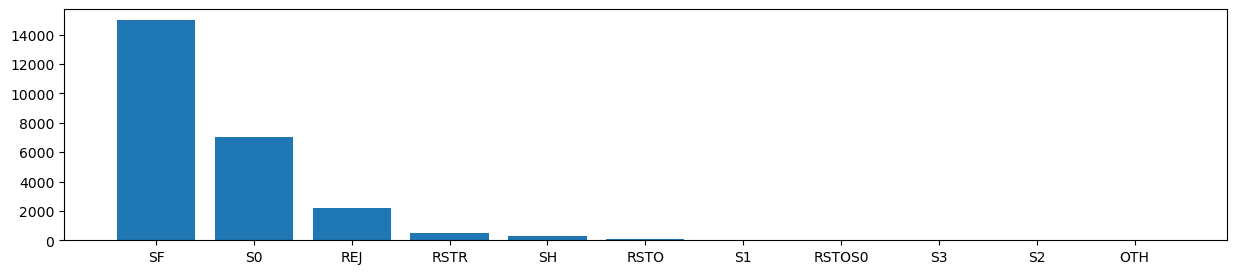

In [10]:
plt.figure(figsize=(15,3))
values = train['flag'].value_counts()
plt.bar(flag, values)

In [11]:
# unique types of protocol_type

protocol_types = train['protocol_type'].unique()
protocol_types

array(['tcp', 'udp', 'icmp'], dtype=object)

<BarContainer object of 3 artists>

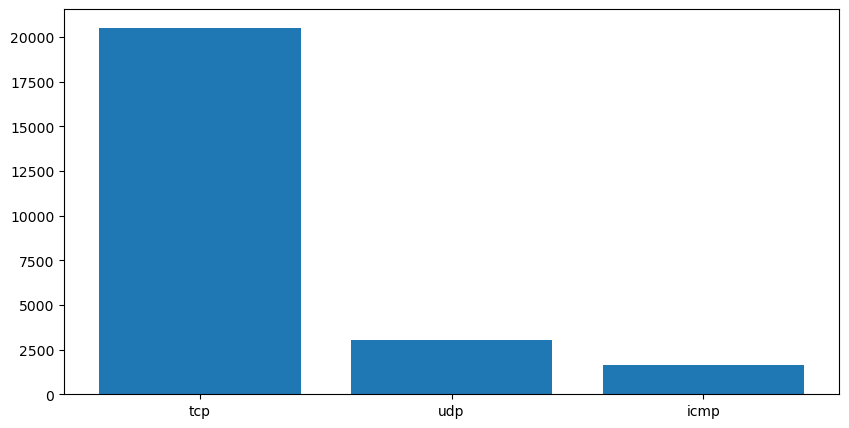

In [12]:
plt.figure(figsize=(10,5))
values = train['protocol_type'].value_counts()
plt.bar(protocol_types, values)

# most used data : tcp, then udp, then icmp

In [13]:
# unique types of service

service = train['service'].unique()
service

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001'], dtype=object)

<BarContainer object of 66 artists>

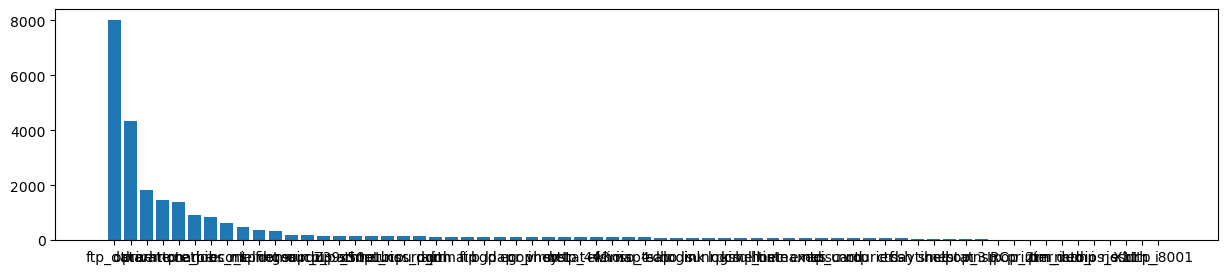

In [14]:
plt.figure(figsize=(15,3))
values = train['service'].value_counts()
plt.bar(service, values)

In [15]:
# unique types of class

class_attack = train['class'].unique()
class_attack

array(['normal', 'anomaly'], dtype=object)

In [16]:
# Missing Values

missing_values = train.isnull().sum()
missing_values

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [17]:
# Checking for any duplicates

print(f"No. of duplicate rows ::  {train.duplicated().sum()}")


No. of duplicate rows ::  0


In [18]:
# dropping redundant columns in both train and test set

train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [19]:
# attack distribution

train["class"].value_counts()


normal     13449
anomaly    11743
Name: class, dtype: int64

<BarContainer object of 2 artists>

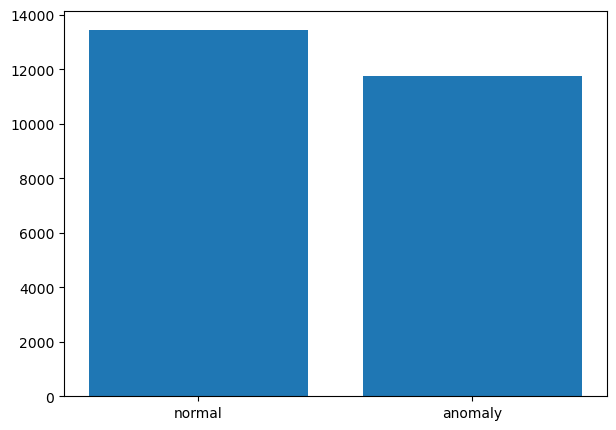

In [20]:
class_type = train['class'].unique()
plt.figure(figsize=(7, 5))
values = train['class'].value_counts()
plt.bar(class_type, values)

#### Data Preprocessing

In [21]:
# feature scaling => scale cols numerical values to have 0 or 1 values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

col = train.select_dtypes(include = ['int64', 'float64']).columns
cols = test.select_dtypes(include = ['int64', 'float64']).columns

sc_train = scaler.fit_transform(train.select_dtypes(include=['int64', 'float64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['int64', 'float64']))

std_train = pd.DataFrame(sc_train, columns = col)
std_test = pd.DataFrame(sc_test, columns = cols)

In [22]:
std_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281


In [23]:
std_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0.650093,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0.650093,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-0.636681,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-2.029801,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-1.753304,-0.489800,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682


In [24]:
# One-Hot Ecoding => dealing with categorical values

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extracting categorical variables from both train and test datasets
cattrain = train.select_dtypes(include = ['object']).copy()
cattest = test.select_dtypes(include = ['object']).copy()

# encoding categorical values
en_train = cattrain.apply(encoder.fit_transform)
en_test = cattest.apply(encoder.fit_transform)


en_Ytrain = en_train[['class']].copy()

# drop the target column => class
en_train = en_train.drop(['class'], axis=1)


##### Categorical values in train dataset before and after encoding

In [25]:
print(cattrain.head())
print('--------------------')
print(en_train.head())

  protocol_type   service flag    class
0           tcp  ftp_data   SF   normal
1           udp     other   SF   normal
2           tcp   private   S0  anomaly
3           tcp      http   SF   normal
4           tcp      http   SF   normal
--------------------
   protocol_type  service  flag
0              1       19     9
1              2       41     9
2              1       46     5
3              1       22     9
4              1       22     9


###### Categorical values in test dataset before and after encoding

In [26]:
print(cattest.head())
print('--------------------')
print(en_test.head())

  protocol_type   service  flag
0           tcp   private   REJ
1           tcp   private   REJ
2           tcp  ftp_data    SF
3          icmp     eco_i    SF
4           tcp    telnet  RSTO
--------------------
   protocol_type  service  flag
0              1       45     1
1              1       45     1
2              1       19     9
3              0       13     9
4              1       55     2


In [27]:
# Join the preprocessed categorical and numeric values

# train
train_X = pd.concat([std_train, en_train], axis=1)
train_y = en_Ytrain

#test
test = pd.concat([std_test, en_test], axis=1)

In [28]:
train_X.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281,1,19,9
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,2,41,9
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,1,46,5
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768,1,22,9
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,1,22,9


In [29]:
train_y.head()

,class
0,1
1,1
2,0
3,1
4,1


In [30]:
test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1,45,1
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1,45,1
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,1,19,9
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483,0,13,9
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682,1,55,2


### MODEL

In [31]:
# Split The Dataset

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_X,train_y,train_size=0.70,
                                                 random_state=2)

In [32]:
X_train.head(3)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
1312,-0.113551,-0.010093,-0.03931,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.066984,-0.445754,-0.287993,1.581378,1.614454,-0.385140,-0.374281,1,46,5
536,-0.113551,-0.010093,-0.03931,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.227251,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,1,17,5
12385,-0.113551,-0.010093,-0.03931,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041,1,6,1


In [33]:
Y_train.head(3)

,class
1312,0
536,0
12385,0


In [34]:
X_test.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
2900,-0.113551,-0.010093,-0.03931,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.38514,-0.374281,1,46,5
11640,-0.113551,-0.010081,-0.03931,-0.00891,11.437678,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.334096,0.527134,-0.287993,-0.641804,-0.627365,-0.38514,-0.374281,2,46,9
16662,-0.113551,-0.010089,-0.03931,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.440940,2.764775,4.233915,-0.641804,-0.627365,-0.38514,-0.374281,0,13,9
21545,-0.113551,-0.010093,-0.03931,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.013561,-0.478183,-0.287993,1.603834,1.614454,-0.38514,-0.374281,1,63,5
8384,-0.113551,-0.010011,-0.02284,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.440940,-0.413324,0.345074,-0.641804,-0.627365,-0.38514,-0.374281,1,22,9


In [35]:
Y_test.head(5)

,class
2900,0
11640,0
16662,0
21545,0
8384,1


#### FITTING THE MODEL


In [36]:
# Data => train_X, train_y, test

# import libraries
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import time

In [37]:
# Train KNeighborsClassifier Model
KNN_classifier = KNeighborsClassifier()
start_time = time.time()
KNN_classifier.fit(X_train, Y_train)
end_time = time.time()
KNN_train_time = end_time - start_time
print("Training time :: ", KNN_train_time)

Training time ::  0.04297137260437012


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [38]:
# Testing time for KNN
start_time = time.time()
y_test_pred = KNN_classifier.predict(X_train)
end_time = time.time()
KNN_test_time = end_time - start_time
print("Testing time: ", KNN_test_time)

Testing time:  4.590871095657349


In [39]:
# Train LogisticRegression Model
LGR_classifier = LogisticRegression(random_state=0)
start_time = time.time()
LGR_classifier.fit(X_train, Y_train)
end_time = time.time()
LGR_train_time = end_time - start_time
print("Training time :: ", LGR_train_time)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time ::  0.7719192504882812


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
# Testing time for LGR
start_time = time.time()
y_test_pred = LGR_classifier.predict(X_train)
end_time = time.time()
LGR_test_time = end_time - start_time
print("Testing time: ", LGR_test_time)

Testing time:  0.010994195938110352


In [41]:
# Train Gaussian Naive Baye Model
BNB_classifier = BernoulliNB()
start_time = time.time()
BNB_classifier.fit(X_train, Y_train)
end_time = time.time()
BNB_train_time = end_time - start_time
print("Training time :: ", BNB_train_time)

Training time ::  0.09040474891662598


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
# Testing time for Naive Baye
start_time = time.time()
y_test_pred = BNB_classifier.predict(X_train)
end_time = time.time()
BNB_test_time = end_time - start_time
print("Testing time: ", BNB_test_time)

Testing time:  0.02398228645324707


In [43]:
# Train Decision Tree Model
DTC_classifier = tree.DecisionTreeClassifier(random_state=0)
start_time = time.time()
DTC_classifier.fit(X_train, Y_train)
end_time = time.time()
DTC_train_time = end_time - start_time
print("Training time :: ", DTC_train_time)

Training time ::  0.2518448829650879


In [44]:
# Testing time for DT
start_time = time.time()
y_test_pred = DTC_classifier.predict(X_train)
end_time = time.time()
DTC_test_time = end_time - start_time
print("Testing time: ", DTC_test_time)

Testing time:  0.015989065170288086


In [45]:
# Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier
  
RFC_classifier = RandomForestClassifier(n_estimators = 30)
start_time = time.time()
RFC_classifier .fit(X_train, Y_train)
end_time = time.time()
RFC_train_time = end_time - start_time
print("Training time: ", RFC_train_time)

C:\Users\user\AppData\Local\Temp\ipykernel_12624\1112640771.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_classifier .fit(X_train, Y_train)


Training time:  0.6036252975463867


In [46]:
# Testing time for RF
start_time = time.time()
y_test_pred = RFC_classifier.predict(X_train)
end_time = time.time()
RFC_test_time = end_time - start_time
print("Testing time: ", RFC_test_time)

Testing time:  0.15590333938598633


<BarContainer object of 5 artists>

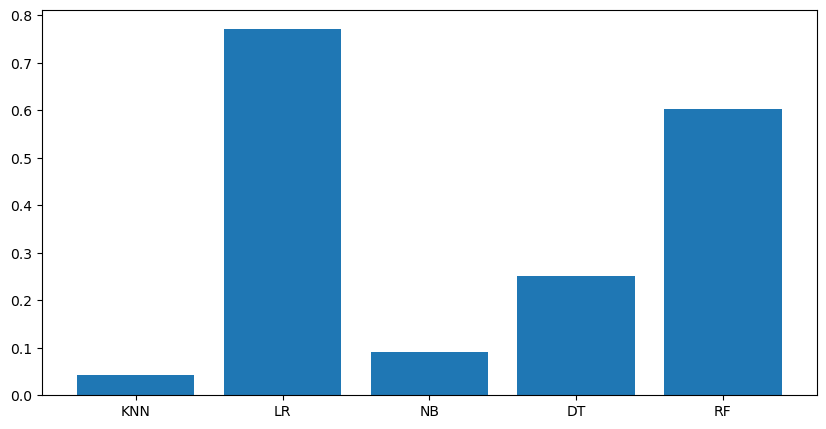

In [47]:
# Training Time
names = ['KNN', 'LR', 'NB', 'DT', 'RF']
values = [KNN_train_time, LGR_train_time, BNB_train_time, DTC_train_time, RFC_train_time]
plt.figure(figsize=(10,5),num=20)
plt.bar(names,values)

<BarContainer object of 5 artists>

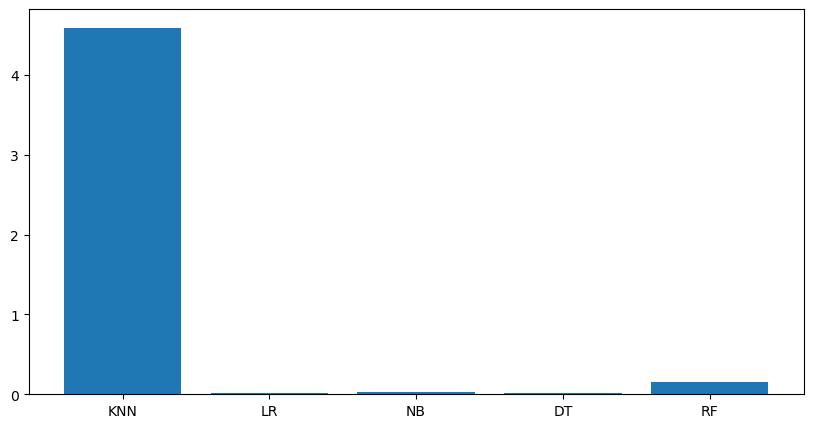

In [48]:
# Testing Time
names = ['KNN', 'LR', 'NB', 'DT', 'RF']
values = [KNN_test_time, LGR_test_time, BNB_test_time, DTC_test_time, RFC_test_time]
plt.figure(figsize=(10,5),num=20)
plt.bar(names,values)

#### EVALUATING THE MODEL  --  train data

In [49]:
from sklearn import metrics

models = []
models.append(('KNeighborsClassifier', KNN_classifier))
models.append(('LogisticRegression', LGR_classifier))
models.append(('Naive Baye Classifier', BNB_classifier))
models.append(('Decision Tree Classifier', DTC_classifier))
models.append(('Random Forest Classifier', RFC_classifier))

for i, val in models:
    
    scores = cross_val_score(val, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, val.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, val.predict(X_train))
    classification = metrics.classification_report(Y_train, val.predict(X_train))
    
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()
    

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples


============================== KNeighborsClassifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9914370153431007

Model Accuracy:
 0.9937620505840989

Confusion matrix:
 [[8168   77]
 [  33 9356]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      8245
           1       0.99      1.00      0.99      9389

    accuracy                           0.99     17634
   macro avg       0.99      0.99      0.99     17634
weighted avg       0.99      0.99      0.99     17634




C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using


============================== LogisticRegression Model Evaluation ==============================

Cross Validation Mean Score:
 0.9540089300987932

Model Accuracy:
 0.9549166383123512

Confusion matrix:
 [[7762  483]
 [ 312 9077]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      8245
           1       0.95      0.97      0.96      9389

    accuracy                           0.95     17634
   macro avg       0.96      0.95      0.95     17634
weighted avg       0.96      0.95      0.95     17634




C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9071666840303904

Model Accuracy:
 0.9071679709651809

Confusion matrix:
 [[7000 1245]
 [ 392 8997]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      8245
           1       0.88      0.96      0.92      9389

    accuracy                           0.91     17634
   macro avg       0.91      0.90      0.91     17634
weighted avg       0.91      0.91      0.91     17634



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9952366482611195

Model Accuracy:
 1.0

Confusion matrix:
 [[8245    0]
 [   0 9389]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8245
           1       1.00      1.00      1.00      9389

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa


============================== Random Forest Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9971645682285013

Model Accuracy:
 0.9999432913689463

Confusion matrix:
 [[8244    1]
 [   0 9389]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8245
           1       1.00      1.00      1.00      9389

    accuracy                           1.00     17634
   macro avg       1.00      1.00      1.00     17634
weighted avg       1.00      1.00      1.00     17634




#### VALIDATING THE MODEL -- test data

In [50]:
for i, val in models:
    accuracy = metrics.accuracy_score(Y_test, val.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, val.predict(X_test))
    classification = metrics.classification_report(Y_test, val.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        


============================== KNeighborsClassifier Model Test Results ==============================

Model Accuracy:
 0.9916644614977508

Confusion matrix:
 [[3458   40]
 [  23 4037]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3498
           1       0.99      0.99      0.99      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



============================== LogisticRegression Model Test Results ==============================

Model Accuracy:
 0.9546176237099762

Confusion matrix:
 [[3294  204]
 [ 139 3921]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      3498
           1       0.95      0.97      0.96      4060

    accuracy                           0.95      7558
   macro avg       0.96      0.9

<BarContainer object of 5 artists>

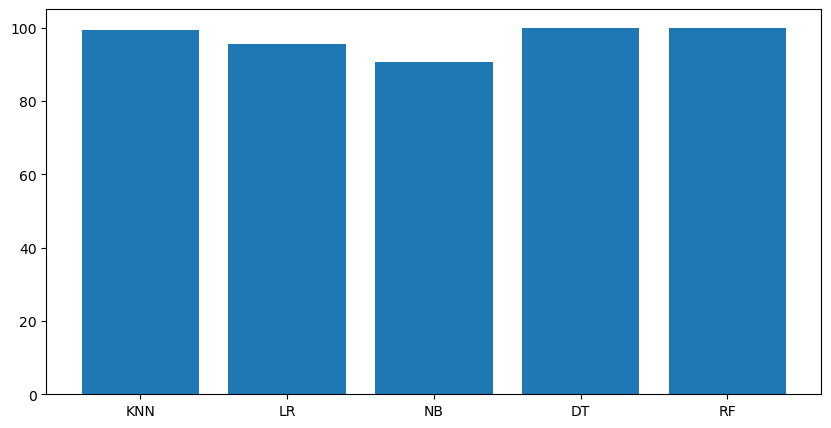

In [51]:
# Training Accuracy
names = ['KNN', 'LR', 'NB', 'DT', 'RF']
values = [99.38, 95.52, 90.72, 100.0, 100.0]
plt.figure(figsize=(10,5),num=20)
plt.bar(names,values)

<BarContainer object of 5 artists>

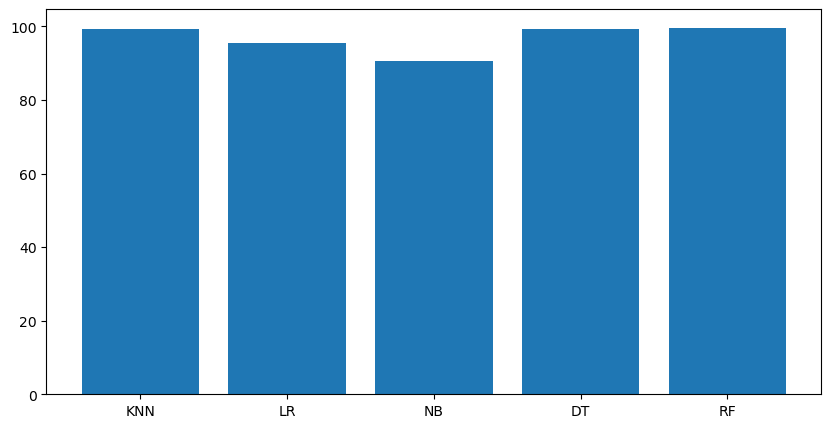

In [52]:
# Testing Accuracy
names = ['KNN', 'LR', 'NB', 'DT', 'RF']
values = [99.17, 95.51, 90.67, 99.39, 99.68]
plt.figure(figsize=(10,5),num=20)
plt.bar(names,values)

#### PREDICTING => using the test dataset

In [53]:
# PREDICTING FOR TEST DATA using KNN
knn_pred = KNN_classifier.predict(test)
NB_pred = BNB_classifier.predict(test)
log_pred = LGR_classifier.predict(test)
dt_pred = DTC_classifier.predict(test)
rf_pred = RFC_classifier.predict(test)

In [54]:
 # Testing for first row
for i, val in models:
    print("For model: ", i)
    print ("Expected: ", Y_test.iloc[0], "Predicted: ", val.predict(X_test).reshape(1, -1)[0][0] )
    print()

For model:  KNeighborsClassifier
Expected:  class    0
Name: 2900, dtype: int32 Predicted:  0

For model:  LogisticRegression
Expected:  class    0
Name: 2900, dtype: int32 Predicted:  0

For model:  Naive Baye Classifier
Expected:  class    0
Name: 2900, dtype: int32 Predicted:  0

For model:  Decision Tree Classifier
Expected:  class    0
Name: 2900, dtype: int32 Predicted:  0

For model:  Random Forest Classifier
Expected:  class    0
Name: 2900, dtype: int32 Predicted:  0



In [55]:
# Testing for second row
for i, val in models:
    print("For model: ", i)
    print ("Expected: ", Y_test.iloc[1], "\tPredicted: ", val.predict(X_test).reshape(1, -1)[0][1] )
    print()

For model:  KNeighborsClassifier
Expected:  class    0
Name: 11640, dtype: int32 	Predicted:  0

For model:  LogisticRegression
Expected:  class    0
Name: 11640, dtype: int32 	Predicted:  0

For model:  Naive Baye Classifier
Expected:  class    0
Name: 11640, dtype: int32 	Predicted:  0

For model:  Decision Tree Classifier
Expected:  class    0
Name: 11640, dtype: int32 	Predicted:  0

For model:  Random Forest Classifier
Expected:  class    0
Name: 11640, dtype: int32 	Predicted:  0



In [56]:
# Testing for five row
for i, val in models:
    print("For model: ", i)
    print ("Expected: ", Y_test.iloc[4], "\tPredicted: ", val.predict(X_test).reshape(1, -1)[0][4] )
    print()

For model:  KNeighborsClassifier
Expected:  class    1
Name: 8384, dtype: int32 	Predicted:  1

For model:  LogisticRegression
Expected:  class    1
Name: 8384, dtype: int32 	Predicted:  1

For model:  Naive Baye Classifier
Expected:  class    1
Name: 8384, dtype: int32 	Predicted:  1

For model:  Decision Tree Classifier
Expected:  class    1
Name: 8384, dtype: int32 	Predicted:  1

For model:  Random Forest Classifier
Expected:  class    1
Name: 8384, dtype: int32 	Predicted:  1



In [57]:
# Testing for row 10
for i, val in models:
    print("For model: ", i)
    print ("Expected: ", Y_test.iloc[9], "\tPredicted: ", val.predict(X_test).reshape(1, -1)[0][9] )
    print()

For model:  KNeighborsClassifier
Expected:  class    1
Name: 3036, dtype: int32 	Predicted:  1

For model:  LogisticRegression
Expected:  class    1
Name: 3036, dtype: int32 	Predicted:  1

For model:  Naive Baye Classifier
Expected:  class    1
Name: 3036, dtype: int32 	Predicted:  1

For model:  Decision Tree Classifier
Expected:  class    1
Name: 3036, dtype: int32 	Predicted:  1

For model:  Random Forest Classifier
Expected:  class    1
Name: 3036, dtype: int32 	Predicted:  1



In [58]:
# Testing for random rows
random_rows = np.random.randint(len(Y_test), size = (5))

for i, val in models:
    for j in random_rows:
        print("For model: ", i)
        print ("Expected: ", Y_test.iloc[j], "\tPredicted: ",
           val.predict(X_test).reshape(1, -1)[0][j] )
        print()

For model:  KNeighborsClassifier
Expected:  class    0
Name: 3025, dtype: int32 	Predicted:  0

For model:  KNeighborsClassifier
Expected:  class    0
Name: 16394, dtype: int32 	Predicted:  0

For model:  KNeighborsClassifier
Expected:  class    0
Name: 21236, dtype: int32 	Predicted:  0

For model:  KNeighborsClassifier
Expected:  class    1
Name: 7528, dtype: int32 	Predicted:  1

For model:  KNeighborsClassifier
Expected:  class    1
Name: 20564, dtype: int32 	Predicted:  1

For model:  LogisticRegression
Expected:  class    0
Name: 3025, dtype: int32 	Predicted:  0

For model:  LogisticRegression
Expected:  class    0
Name: 16394, dtype: int32 	Predicted:  0

For model:  LogisticRegression
Expected:  class    0
Name: 21236, dtype: int32 	Predicted:  0

For model:  LogisticRegression
Expected:  class    1
Name: 7528, dtype: int32 	Predicted:  1

For model:  LogisticRegression
Expected:  class    1
Name: 20564, dtype: int32 	Predicted:  1

For model:  Naive Baye Classifier
Expected: 

In [59]:
# Testing for random rows
random_rows = np.random.randint(len(Y_test), size = (5))

for j in random_rows:
    for i, val in models:
        print("For model: ", i)
        print ("Expected: ", Y_test.iloc[j], "\tPredicted: ",
           val.predict(X_test).reshape(1, -1)[0][j] )
        print()

For model:  KNeighborsClassifier
Expected:  class    0
Name: 2698, dtype: int32 	Predicted:  0

For model:  LogisticRegression
Expected:  class    0
Name: 2698, dtype: int32 	Predicted:  0

For model:  Naive Baye Classifier
Expected:  class    0
Name: 2698, dtype: int32 	Predicted:  0

For model:  Decision Tree Classifier
Expected:  class    0
Name: 2698, dtype: int32 	Predicted:  0

For model:  Random Forest Classifier
Expected:  class    0
Name: 2698, dtype: int32 	Predicted:  0

For model:  KNeighborsClassifier
Expected:  class    0
Name: 418, dtype: int32 	Predicted:  0

For model:  LogisticRegression
Expected:  class    0
Name: 418, dtype: int32 	Predicted:  0

For model:  Naive Baye Classifier
Expected:  class    0
Name: 418, dtype: int32 	Predicted:  0

For model:  Decision Tree Classifier
Expected:  class    0
Name: 418, dtype: int32 	Predicted:  0

For model:  Random Forest Classifier
Expected:  class    0
Name: 418, dtype: int32 	Predicted:  0

For model:  KNeighborsClassifie

In [60]:
# locating a row given the value
# locatedRow = Y_test.loc[Y_test['class'] == 2900]
# print(locatedRow)


### VOTING CLASSIFIER - ensemble

In [61]:
# import libraries
from sklearn.ensemble import VotingClassifier

In [62]:
# Creating the ensemble model

def ensembleModel(df_trainX, df_trainY, df_testX, df_testY):
    
    # voting 'hard' - majority vote based on individual models
    ensemble_model = VotingClassifier(estimators=
                [
                    ('KNN - ', KNN_classifier),
                    ('LGR - ', LGR_classifier),
                    ('BNB - ', BNB_classifier),
                    ('DT - ', DTC_classifier),
                    ('RF', RFC_classifier) 
                ],
                voting='hard')

    # Fitting the model on the training data
    ensemble_model.fit(df_trainX, df_trainY)

    # Predicting on the testing data
    y_pred = ensemble_model.predict(df_testX)
    
    # Testing for random rows
    random_rows = np.random.randint(len(Y_test), size = (5))

    for j in random_rows:
        print ("Expected: ", df_testY.iloc[j], "\tPredicted: ",val.predict(df_testX).reshape(1, -1)[0][j] )
        print()

    # Evaluating the accuracy of the model
    accuracy = metrics.accuracy_score(df_testY, val.predict(df_testX))
    print(f"\nAccuracy: {accuracy}")
    
ensembleModel(X_train, Y_train, X_test, Y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

Expected:  class    1
Name: 21749, dtype: int32 	Predicted:  1

Expected:  class    1
Name: 13175, dtype: int32 	Predicted:  1

Expected:  class    1
Name: 580, dtype: int32 	Predicted:  1

Expected:  class    0
Name: 24784, dtype: int32 	Predicted:  0

Expected:  class    1
Name: 24590, dtype: int32 	Predicted:  1


Accuracy: 0.9970891770309606
